# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Salsa Tashfiyatul Qolbi
- **Email:** salsatash@gmail.com
- **ID Dicoding:** MC009D5X0875

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca & suhu terhadap jumlah penyewaan sepeda?
- Kapan waktu paling sibuk dan paling sepi dalam penyewaan sepeda berdasarkan jam, hari, dan musim?

## Import Semua Packages/Library yang Digunakan

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

- Library NumPy digunakan untuk
- Library Pandas digunakan pengelolaan dan analisis data.
- Library Matplotlib digunakan untuk visualisasi data.
- Library Seaborn digunakan untuk visualisasi data sama seperti Matplotlib
Librari Zipfile digunakan untuk memanipulasi file ZIP

## Data Wrangling

### Gathering Data

####Mendownload dataset menggunakan Kaggle API

In [43]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


####Mengekstrak file ZIP bernama bike-sharing-dataset.zip ke dalam folder bernama bike_data.

In [44]:
with zipfile.ZipFile("bike-sharing-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("bike_data")

####Memuat tabel hour

In [45]:
hour_df = pd.read_csv("bike_data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


####Memuat tabel day

In [46]:
day_df = pd.read_csv("bike_data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Berdasarkan kedua tabel di atas, didapatkan 17 data sebagai berikut:
1.   Instant: indeks dari record
2.   dteday: tanggal penyewaan
3. season: musim (1. Musim Semi, 2. Musim Panas, 3. Musim Gugur, 4. Musim Dingin)
4. yr: tahun (0: 2011, 1: 2012)
5. mnth: bulan (1 sampai 12)
6. hr: jam (0 sampai 23) kolom ini tidak ada pada tabel day
7. holiday: 1 jika libur, 0 jika tidak libur
8. weekday: 7 hari dalam 1 minggu
9. workingday: 1 jika tidak libur dan bukan akhir mimggu, 0 jika libur
10.  wethersit: (1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian)
(2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut)
(3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan)
(4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut)
11. temp: temperatur normal dalam celsius
12. atemp: menormalisasikan temperatur yang dirasakan dalam celsius
13. hum: mormalisasi kelembaban
14. windspeed: normalisasi kecepatan angin
15. casual: jumlah dari pengguna biasa
16. registered: jumlah pengguna terdaftar
17. cnt: jumlah total sepeda sewaan termasuk sepeda kasual dan terdaftar






### Assessing Data

####Memeriksa data pada tabel hour

In [47]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [48]:
print(hour_df.duplicated().sum())

0


In [49]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [50]:
print(hour_df["season"].unique())
print(hour_df["weathersit"].unique())


[1 2 3 4]
[1 2 3 4]


In [70]:
Q1 = hour_df["cnt"].quantile(0.25)
Q3 = hour_df["cnt"].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outliers = hour_df[(hour_df["cnt"] < batas_bawah) | (hour_df["cnt"] > batas_atas)]
print(f"Jumlah Outlier: {outliers.shape[0]}")


Jumlah Outlier: 505


####Memeriksa data pada tabel day

In [51]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [52]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [53]:
print(day_df.duplicated().sum())

0


In [54]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [55]:
print(day_df["season"].unique())
print(day_df["weathersit"].unique())


[1 2 3 4]
[2 1 3]


In [72]:
Q1 = day_df["cnt"].quantile(0.25)
Q3 = day_df["cnt"].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outliers = day_df[(day_df["cnt"] < batas_bawah) | (day_df["cnt"] > batas_atas)]
print(f"Jumlah Outlier: {outliers.shape[0]}")


Jumlah Outlier: 0


**Insight:**
- Pada kedua tabel tidak terdapat missing value.
- Terdapat kesalahan tipe data pada kedua tabel, yaitu pada kolom dteday yang bertipe object, seharusnya bertipe datetime.
- Tidak terdapat duplikasi data pada kedua tabel.
- Tidak terdapat inaccurate value pada kedua tabel.
- Terdapat inconsistent value pada kedua tabel. Pada kolom weathersit terdapat perbedaan data, dimana pada tabel hour terdapat 4 kategori, sedangkan pada tabel day hanya terdapat 3 kategori
- Terdapat outlier pada tabel hour

### Cleaning Data

####Membersihkan data hour_df dan day_df
Proses ini dilakukan menggunakan Library Pandas dengan fucntion to_datetime. Selain mengganti tipe data, kode di bawah juga mengatur format penulisan tanggal, yaitu YYYY-MM-DD

In [56]:
datetime_columns = ["dteday"]
hour_df[datetime_columns] = hour_df[datetime_columns].apply(pd.to_datetime, format="%Y-%m-%d")
day_df[datetime_columns] = day_df[datetime_columns].apply(pd.to_datetime, format="%Y-%m-%d")

In [57]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [58]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

####Memperbaiki Inconsistent Value
Proses ini dilakukan dengan menggunakan Library Pandas dengan method groupby()

Kode di bawah digunakan untuk mencetak jumlah dari masing-masing kategori di weathersit

In [59]:
print("Distribusi Weather di day.csv:")
print(day_df["weathersit"].value_counts())

print("\nDistribusi Weather di hour.csv:")
print(hour_df["weathersit"].value_counts())


Distribusi Weather di day.csv:
weathersit
1    463
2    247
3     21
Name: count, dtype: int64

Distribusi Weather di hour.csv:
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


Terlihat bahwa pada tabel day terdapat 3 kategori dan pada tabel hour terdapat 4 kategori

Kode di bawah digunakan untuk mencetak record mana yang memiliki kategori nomor 4 pada tabel hour, dan mencari record tersebut pada tabel day dan memeriksa apakah memilki kategori yang sama

In [60]:
days_with_weather_4 = hour_df[hour_df["weathersit"] == 4]["dteday"].unique()
print("Hari dengan Weather 4 di hour.csv:", days_with_weather_4)

days_in_day = day_df[day_df["dteday"].isin(days_with_weather_4)]
print("\nApakah ada di day.csv?", days_in_day)


Hari dengan Weather 4 di hour.csv: <DatetimeArray>
['2011-01-26 00:00:00', '2012-01-09 00:00:00', '2012-01-21 00:00:00']
Length: 3, dtype: datetime64[ns]

Apakah ada di day.csv?      instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
25        26 2011-01-26       1   0     1        0        3           1   
373      374 2012-01-09       1   1     1        0        1           1   
385      386 2012-01-21       1   1     1        0        6           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
25            3  0.217500  0.203600  0.862500   0.293850      34         472   
373           2  0.224167  0.247479  0.701667   0.098900     106        2270   
385           2  0.173333  0.174875  0.831250   0.222642      67        1234   

      cnt  
25    506  
373  2376  
385  1301  


Terlihat bahwa pada tabel hour terdapat 3 record yang memiliki kategori nomor 4, tetapi jika dicari pada tabel day, data tersebut memiliki ketegori yang berbeda

Kode di bawah digunakan untuk menghitung weathersit dari data hour.csv menggunakan modus (mode) atau persentase dominan.

In [61]:
day_weather_fixed = hour_df.groupby("dteday")["weathersit"].agg(lambda x: x.mode()[0])

day_df["weathersit"] = day_df["dteday"].map(day_weather_fixed)


In [62]:
print(day_df["weathersit"].unique())


[1 2 3]


####Memperbaiki data outlier
Proses ini menggunakan metode imputation

In [79]:
hour_df["cnt"] = np.where(hour_df["cnt"] < batas_bawah, batas_bawah, hour_df["cnt"])
hour_df["cnt"] = np.where(hour_df["cnt"] > batas_atas, batas_atas, hour_df["cnt"])

In [82]:
outliers = hour_df[(hour_df["cnt"] < batas_bawah) | (hour_df["cnt"] > batas_atas)]

print(f"Jumlah Outlier Setelah Perubahan: {outliers.shape[0]}")


Jumlah Outlier Setelah Perubahan: 0


**Insight:**
- Tipe data pada kolom dteday sudah berubah, yang awalnya bertipe data object menjadi datetime
- Kedua tabel hanya memiliki 3 tipe data, yaitu integer, float, dan datetime
- Tidak terjadi perubahan pada perbaikan data, itu disebabkan karena pada proses agregasi data kategori 4 diabaikan karena jumlahnya sangat sedikit daripada kategori 1, 2, dan 3.
- Sudah tidak terdapat outlier pada tabel hour

## Exploratory Data Analysis (EDA)

### Explore


In [83]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,zscore
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,1.737900e+04
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,186.361327,-1.054836e-16
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.039037e+00
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,-8.240221e-01
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,-2.616742e-01
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,5.046626e-01
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,642.500000,4.341860e+00
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,171.931168,1.000029e+00


In [84]:
hour_df.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,zscore
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.274968,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.274359,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.179728,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.246329,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.121256,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.404993,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.029729,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.028075,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.022592,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.144439,-0.142426


####Insight:
- kolom temp dan kolom cnt memiliki korelasi positi yang menunjukan baahwa semakin tinggi suhu, semakin banyak sepeda yang disewa.
- Kolom weathersit dan kolom cnt memiliki korelasi negatif yang menunjukan bahwa semakin buruk cuaca, semakin sedikit penyewaan sepeda.
- Kolom registered dan kolom cnt memiliki korelasi tinggi, sebagian besar penyewaan berasal dari pengguna terdaftar
- Kolom windspeed dan kolom cnt memiliki korelasi kecil yang menunjukan bahwa kecepetan angin tidak begitu berpengaruh pada penyewaan sepeda.

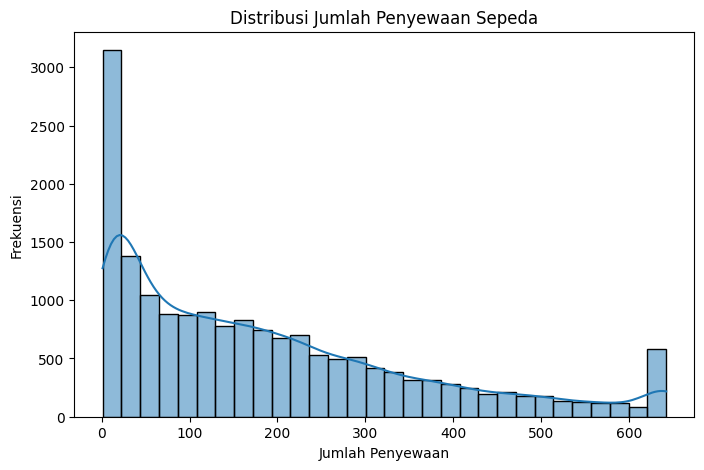

In [85]:
plt.figure(figsize=(8,5))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

####Insight
- Mayoritas penyewaan sepeda terjadi pada jumlah yang rendah, kurang dari 100 penyewaan per-jam
- Lebih banyak waktu dengan sedikit penyewaan dibandingkan jumlah penyewaan tinggi
- Ada peningkatan kecil disekitar 600 penyewaan yang kemungkinan terjadi pada jam sibuk atau hari tertentu dengan permintaan tinggi.

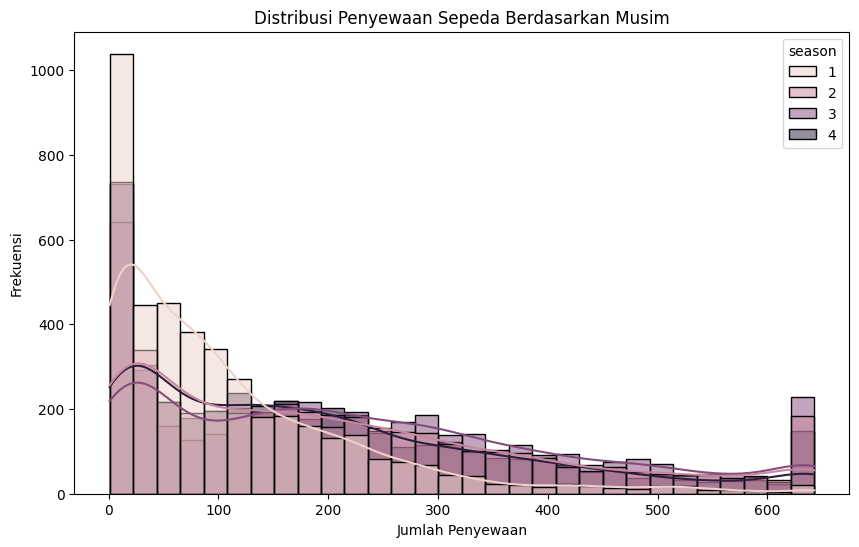

In [89]:
plt.figure(figsize=(10,6))
sns.histplot(data=hour_df, x='cnt', hue='season', bins=30, kde=True)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()


**Insight:**
- Penyewaan lebih rendah pada musim dingin dibandingkan musim lainnya.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh faktor cuaca & suhu terhadap jumlah penyewaan sepeda?

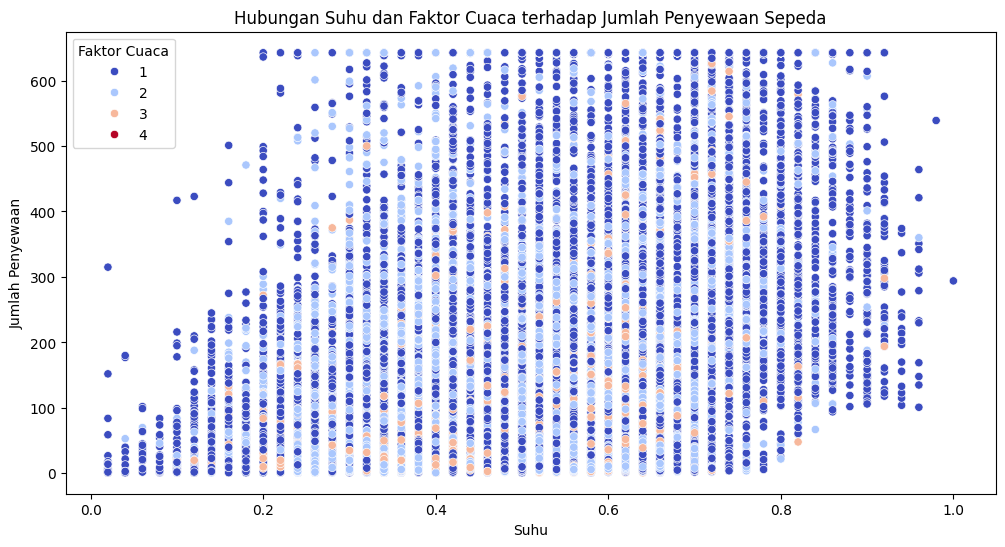

In [86]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=hour_df['temp'], y=hour_df['cnt'], hue=hour_df['weathersit'], palette="coolwarm")
plt.title("Hubungan Suhu dan Faktor Cuaca terhadap Jumlah Penyewaan Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Faktor Cuaca")
plt.show()


####Insight:
- Sebagian besar penyewaan terjadi pada saat cuaca cerah
- Saat cuaca memburuk (faktor cuaca lebih tinggi), jumlah penyewaan cenderung menurun.
- Ini menunjukkan bahwa orang cenderung lebih banyak menyewa sepeda saat suhu lebih hangat.
-Data tersebar cukup luas, tetapi tetap mengikuti pola bahwa suhu yang lebih tinggi mendorong peningkatan penyewaan sepeda.
-Pada suhu yang sangat rendah atau sangat tinggi, penyewaan sepeda tetap ada, tetapi jumlahnya lebih bervariasi.

### Pertanyaan 2: Kapan waktu paling sibuk dan paling sepi dalam penyewaan sepeda berdasarkan jam, hari, dan musim?

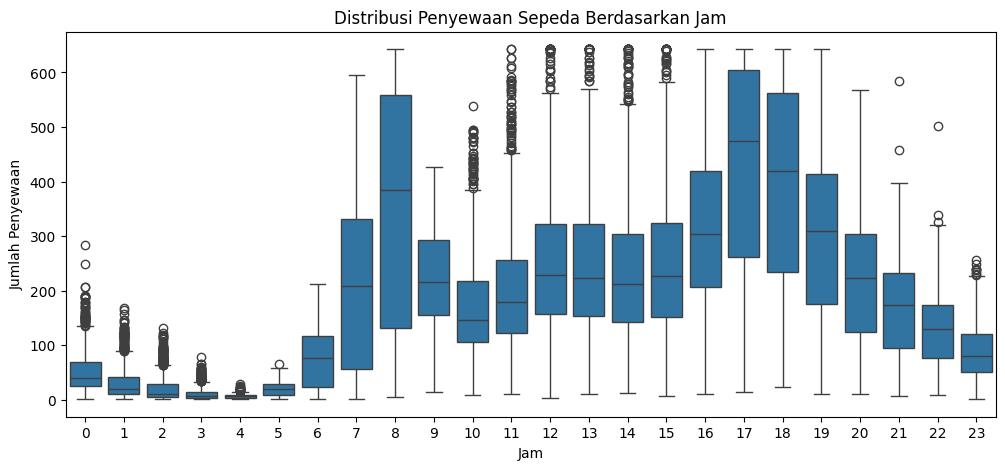

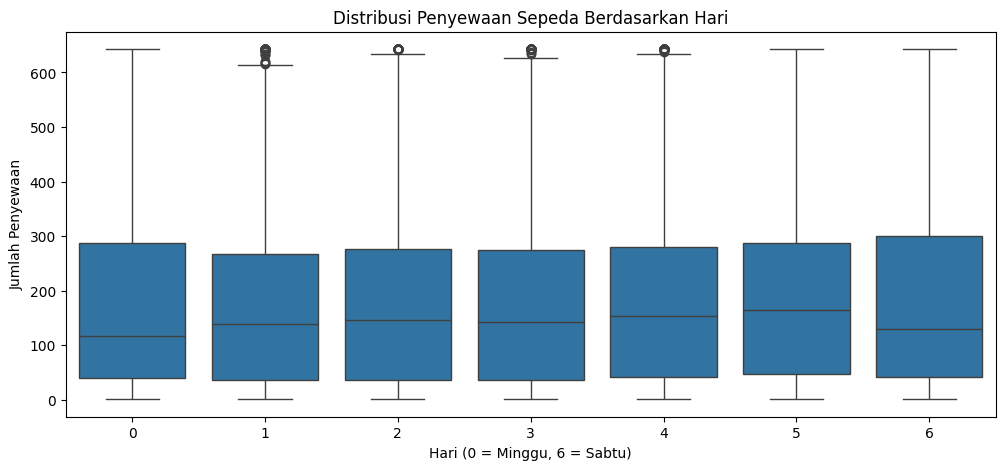

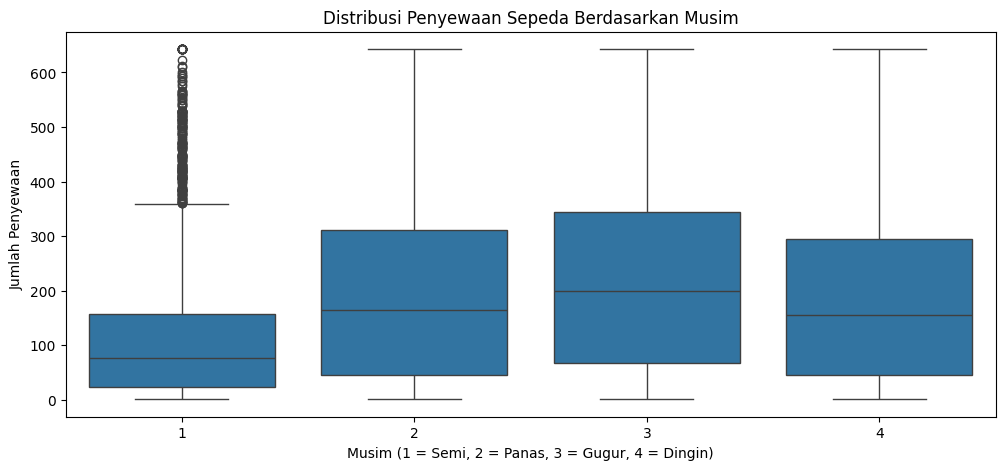

In [87]:
plt.figure(figsize=(12,5))
sns.boxplot(x=hour_df['hr'], y=hour_df['cnt'])
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x=hour_df['weekday'], y=hour_df['cnt'])
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Hari")
plt.xlabel("Hari (0 = Minggu, 6 = Sabtu)")
plt.ylabel("Jumlah Penyewaan")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x=hour_df['season'], y=hour_df['cnt'])
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim (1 = Semi, 2 = Panas, 3 = Gugur, 4 = Dingin)")
plt.ylabel("Jumlah Penyewaan")
plt.show()


**Insight:**

  Boxplot distribusi penyewaan sepeda berdasarkan jam:

- Penyewaan cenderung rendah saat dini hari dan mulai meningkat di jam 7 pagi hingga 18 sore

Boxplot penyewaan sepeda berdasarkan hari

- tidak ada perbedaan signifikan antar hari, yang menunjukan bahwa penyewaan cukup merata setiap harinya

Boxplot distribusi penyewaan sepeda berdasarkan musim

- Musim semi memiliki lebih banyak oulier dibandingkan musim lain yang jumlah penyewaannya lebih stabil


## Analisis Lanjutan (Opsional)

####Melihat tren jumlah penyewaan dari waktu ke waktu

<ipython-input-91-db025c51134d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_df, x='dteday', y='cnt', ci=None)


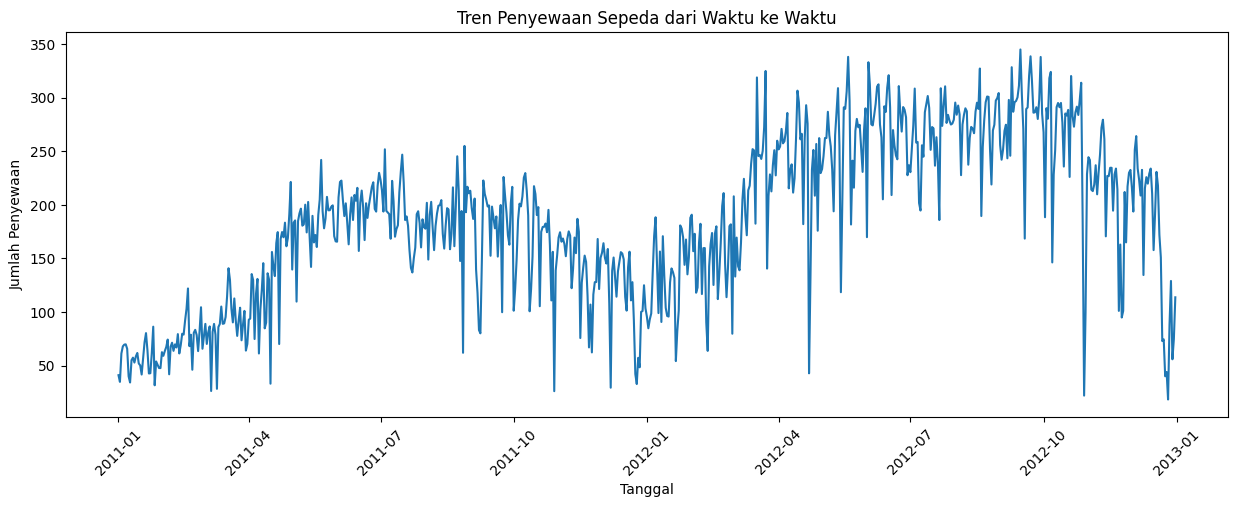

In [91]:
plt.figure(figsize=(15,5))
sns.lineplot(data=hour_df, x='dteday', y='cnt', ci=None)
plt.xticks(rotation=45)
plt.title("Tren Penyewaan Sepeda dari Waktu ke Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.show()


####Insight:
- Grafik menunjukan bahwa jumlah penyewaan mengalami fluktuasi.
- Tren menurun menjelang akhir tahun yang menunjukan pengaruh musim dingin, di mana lebih sedikit orang yang menyewa sepeda.
-Puncak penyewaan mungkin terjadi di musim yang lebih hangat


## Conclusion

####Conclution pertanyaan 1
- Suhu dan cuaca berpengaruh terhadap jumlah penyewaan sepeda.
- Cuaca yang baik dan suhu yang hangat cenderung meningkatkan jumlah penyewaan.

####Conclution pertanyaan 2
- Waktu tersibuk untuk penyewaan sepeda terjadi di pagi hari sampai sore hari saat jam kerja dan saat musim gugur dan panas.
- Waktu paling sepi untuk penyewaan sepeda terjadi pada dini hari dan saat musim semi.